# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [3]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score
from sklearn import svm
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import metrics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# 1. Exploratieve Data Analyse (EDA)

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: kinderen tot 16 die werkzaam zijn.

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scikit Learn

De data voldoet aan alle voorwaarde voor machine learning met Scikit learn.

- Het zijn numerieke waardes
- Er zijn geen missende waardes
- Het staat in een dataframe

In [5]:
display(train.head())
display(train.info())
display(train.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


visualiseren van de evenutele missende waarde in de traindata

<Axes: >

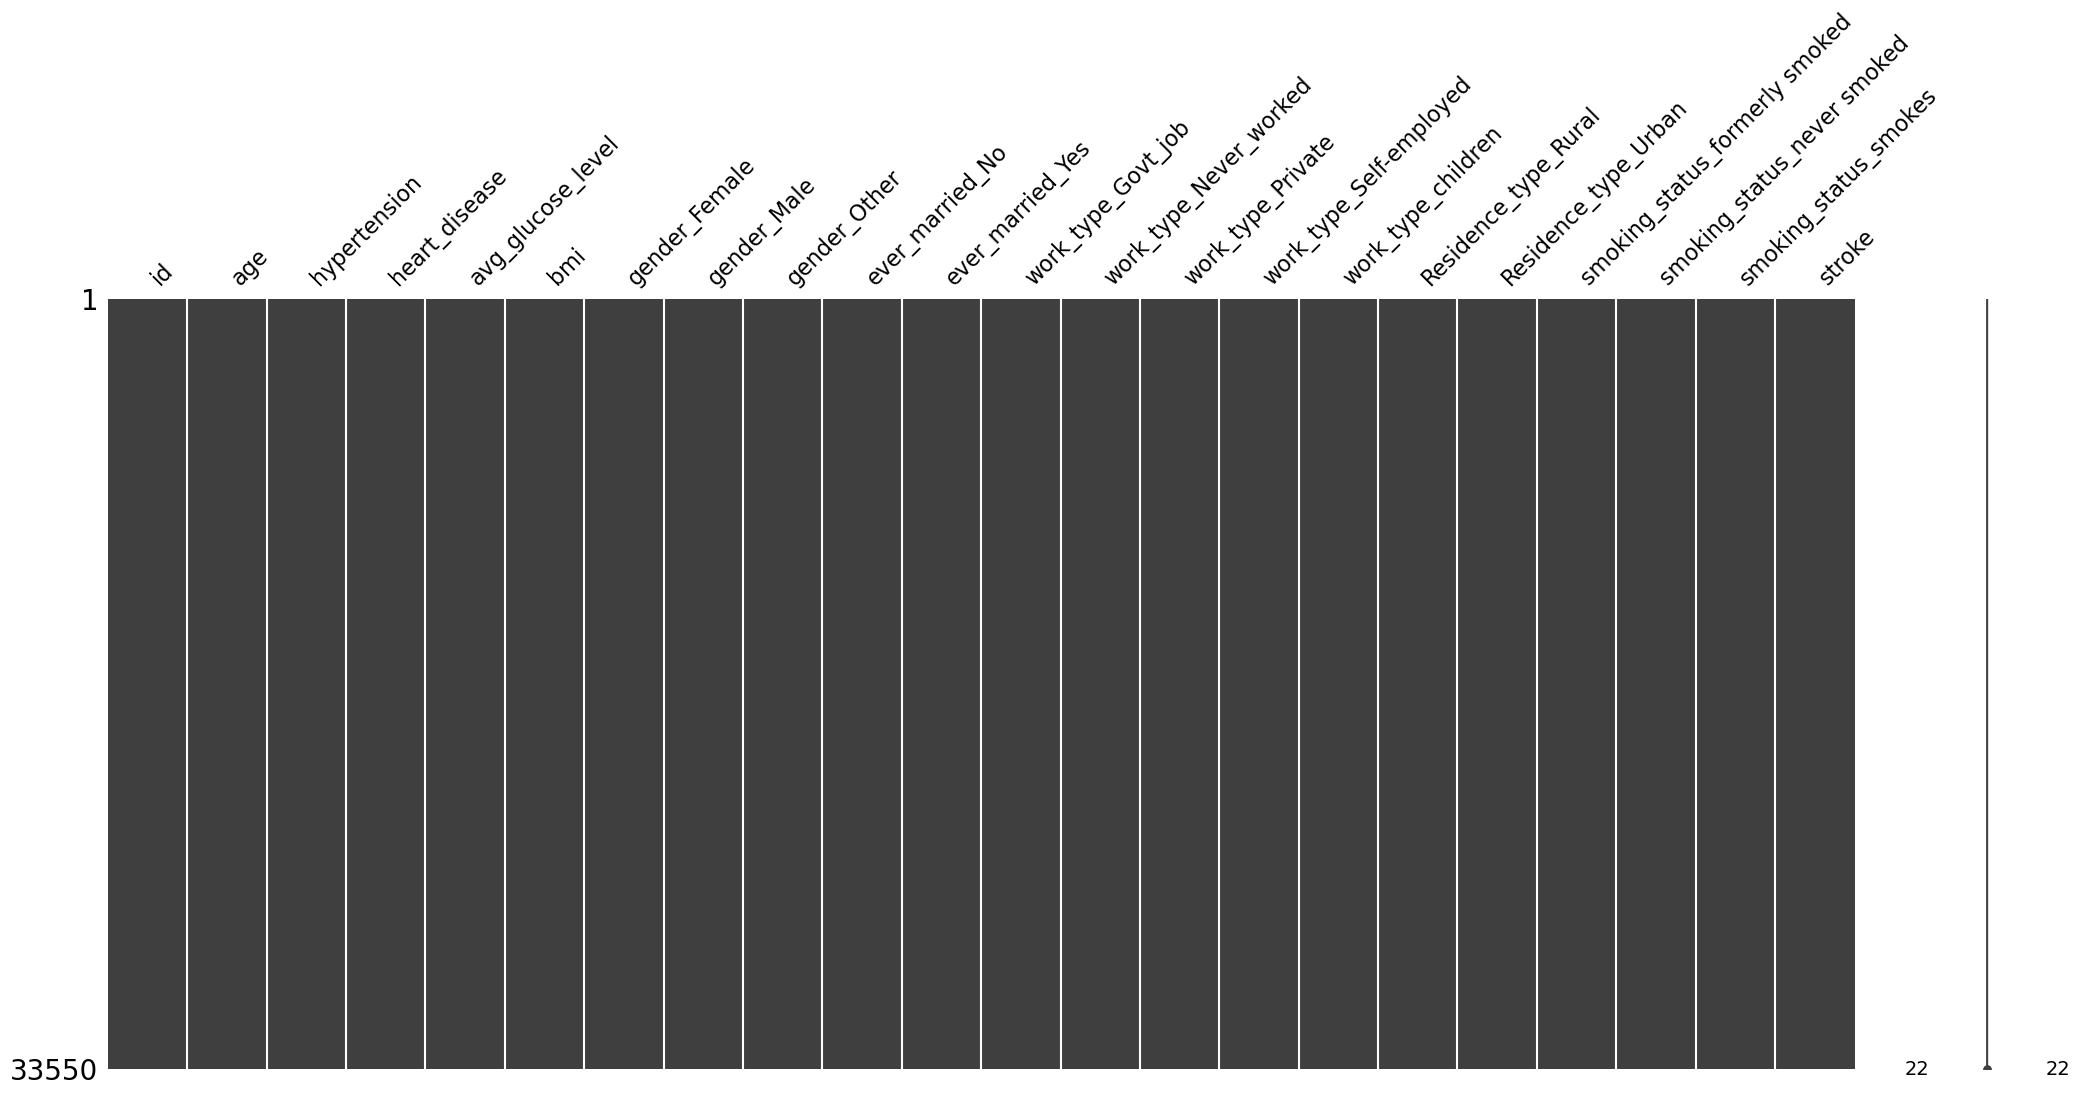

In [6]:
msno.matrix(train)

visualiseren van de evenutele missende waarde in de testdata

<Axes: >

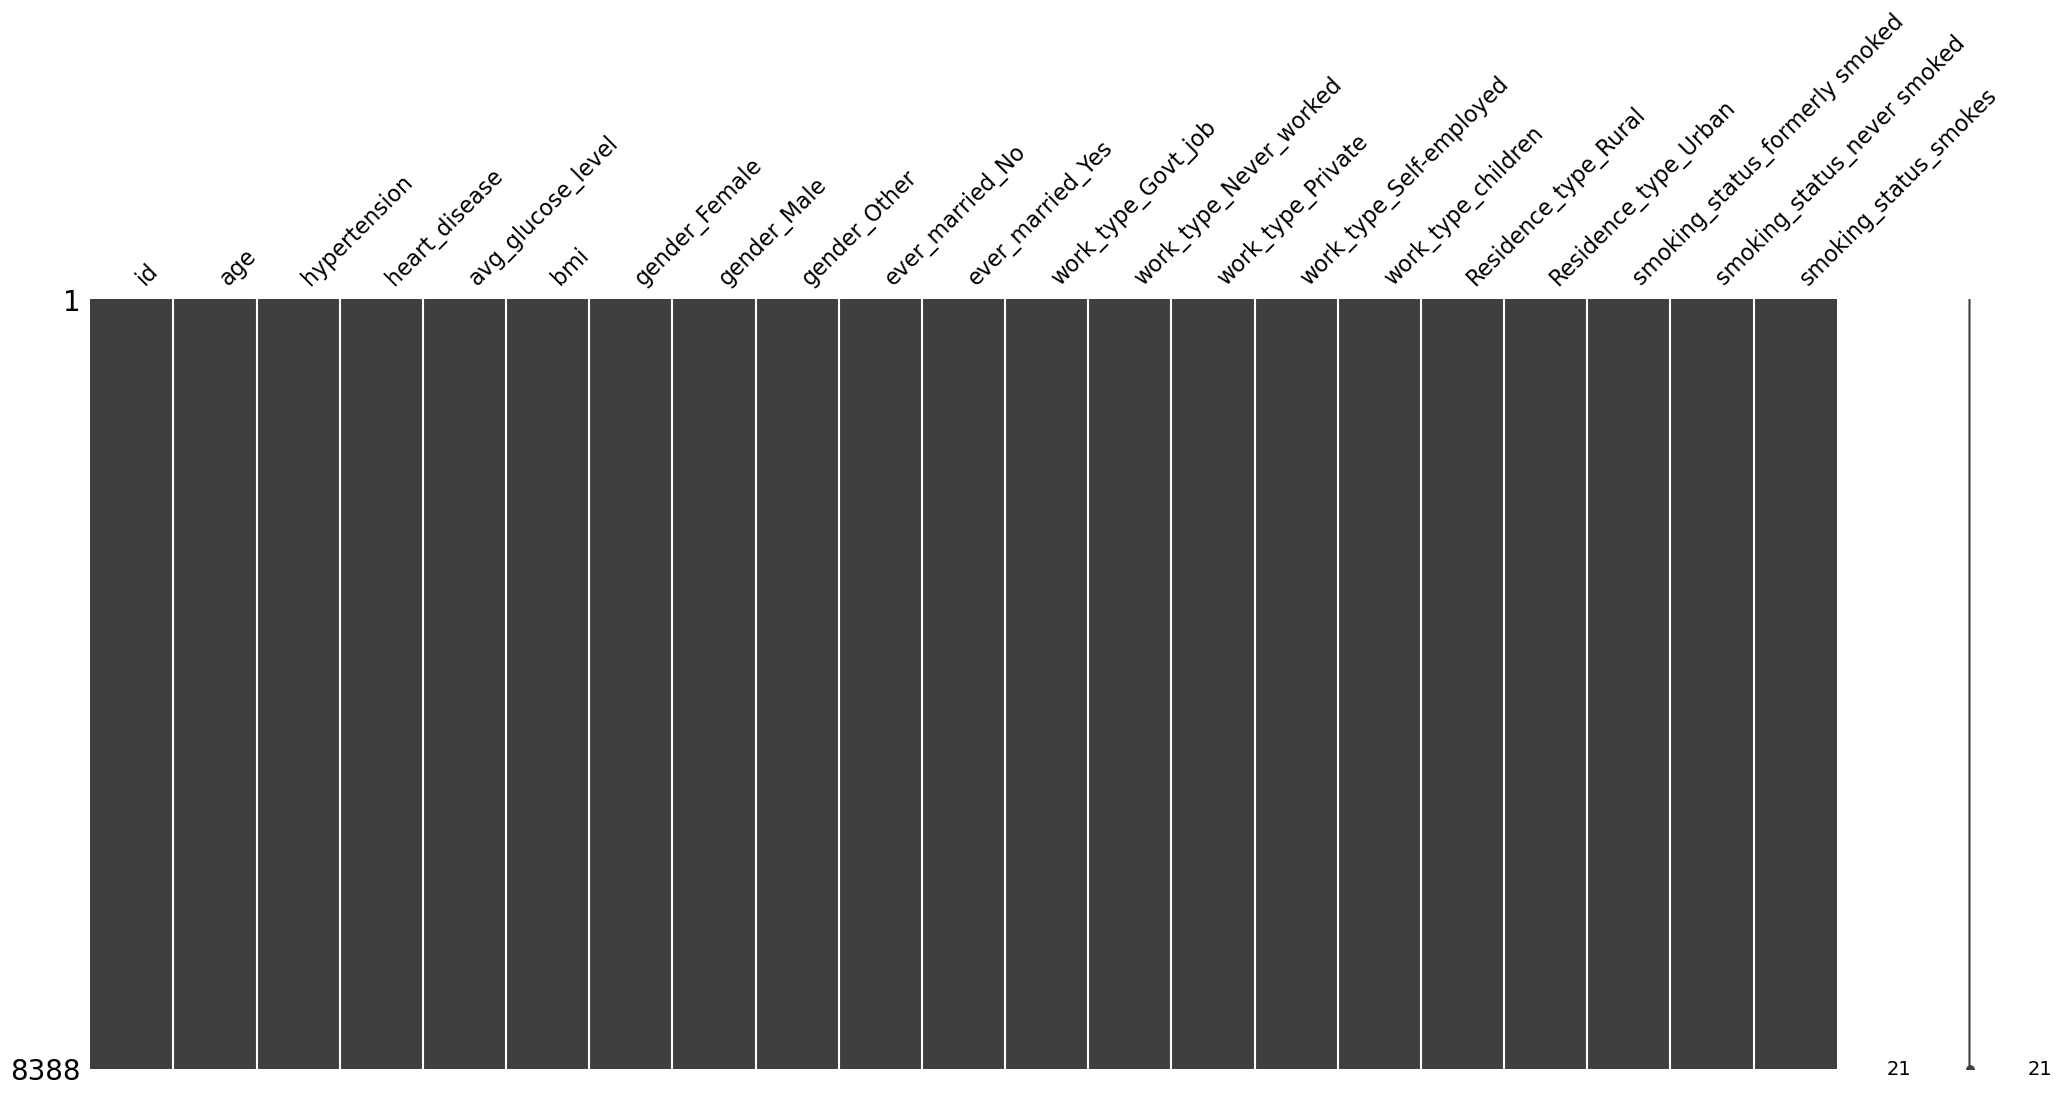

In [7]:
msno.matrix(test)

### 1.2.1 maak de evenutele aanpassingen

De data voldoet aan alle eisen en er hoeven dus geen aanpassingen te worden gemaakt verder

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

We zien dat er tussen bepaalde kolommen een directe corrolatie is, bijvoorbeeld man en vrouw. Dit moet worden aangepast zodat er geen multicollineariteit is voor de modellen die hier last van hebben.

<Axes: >

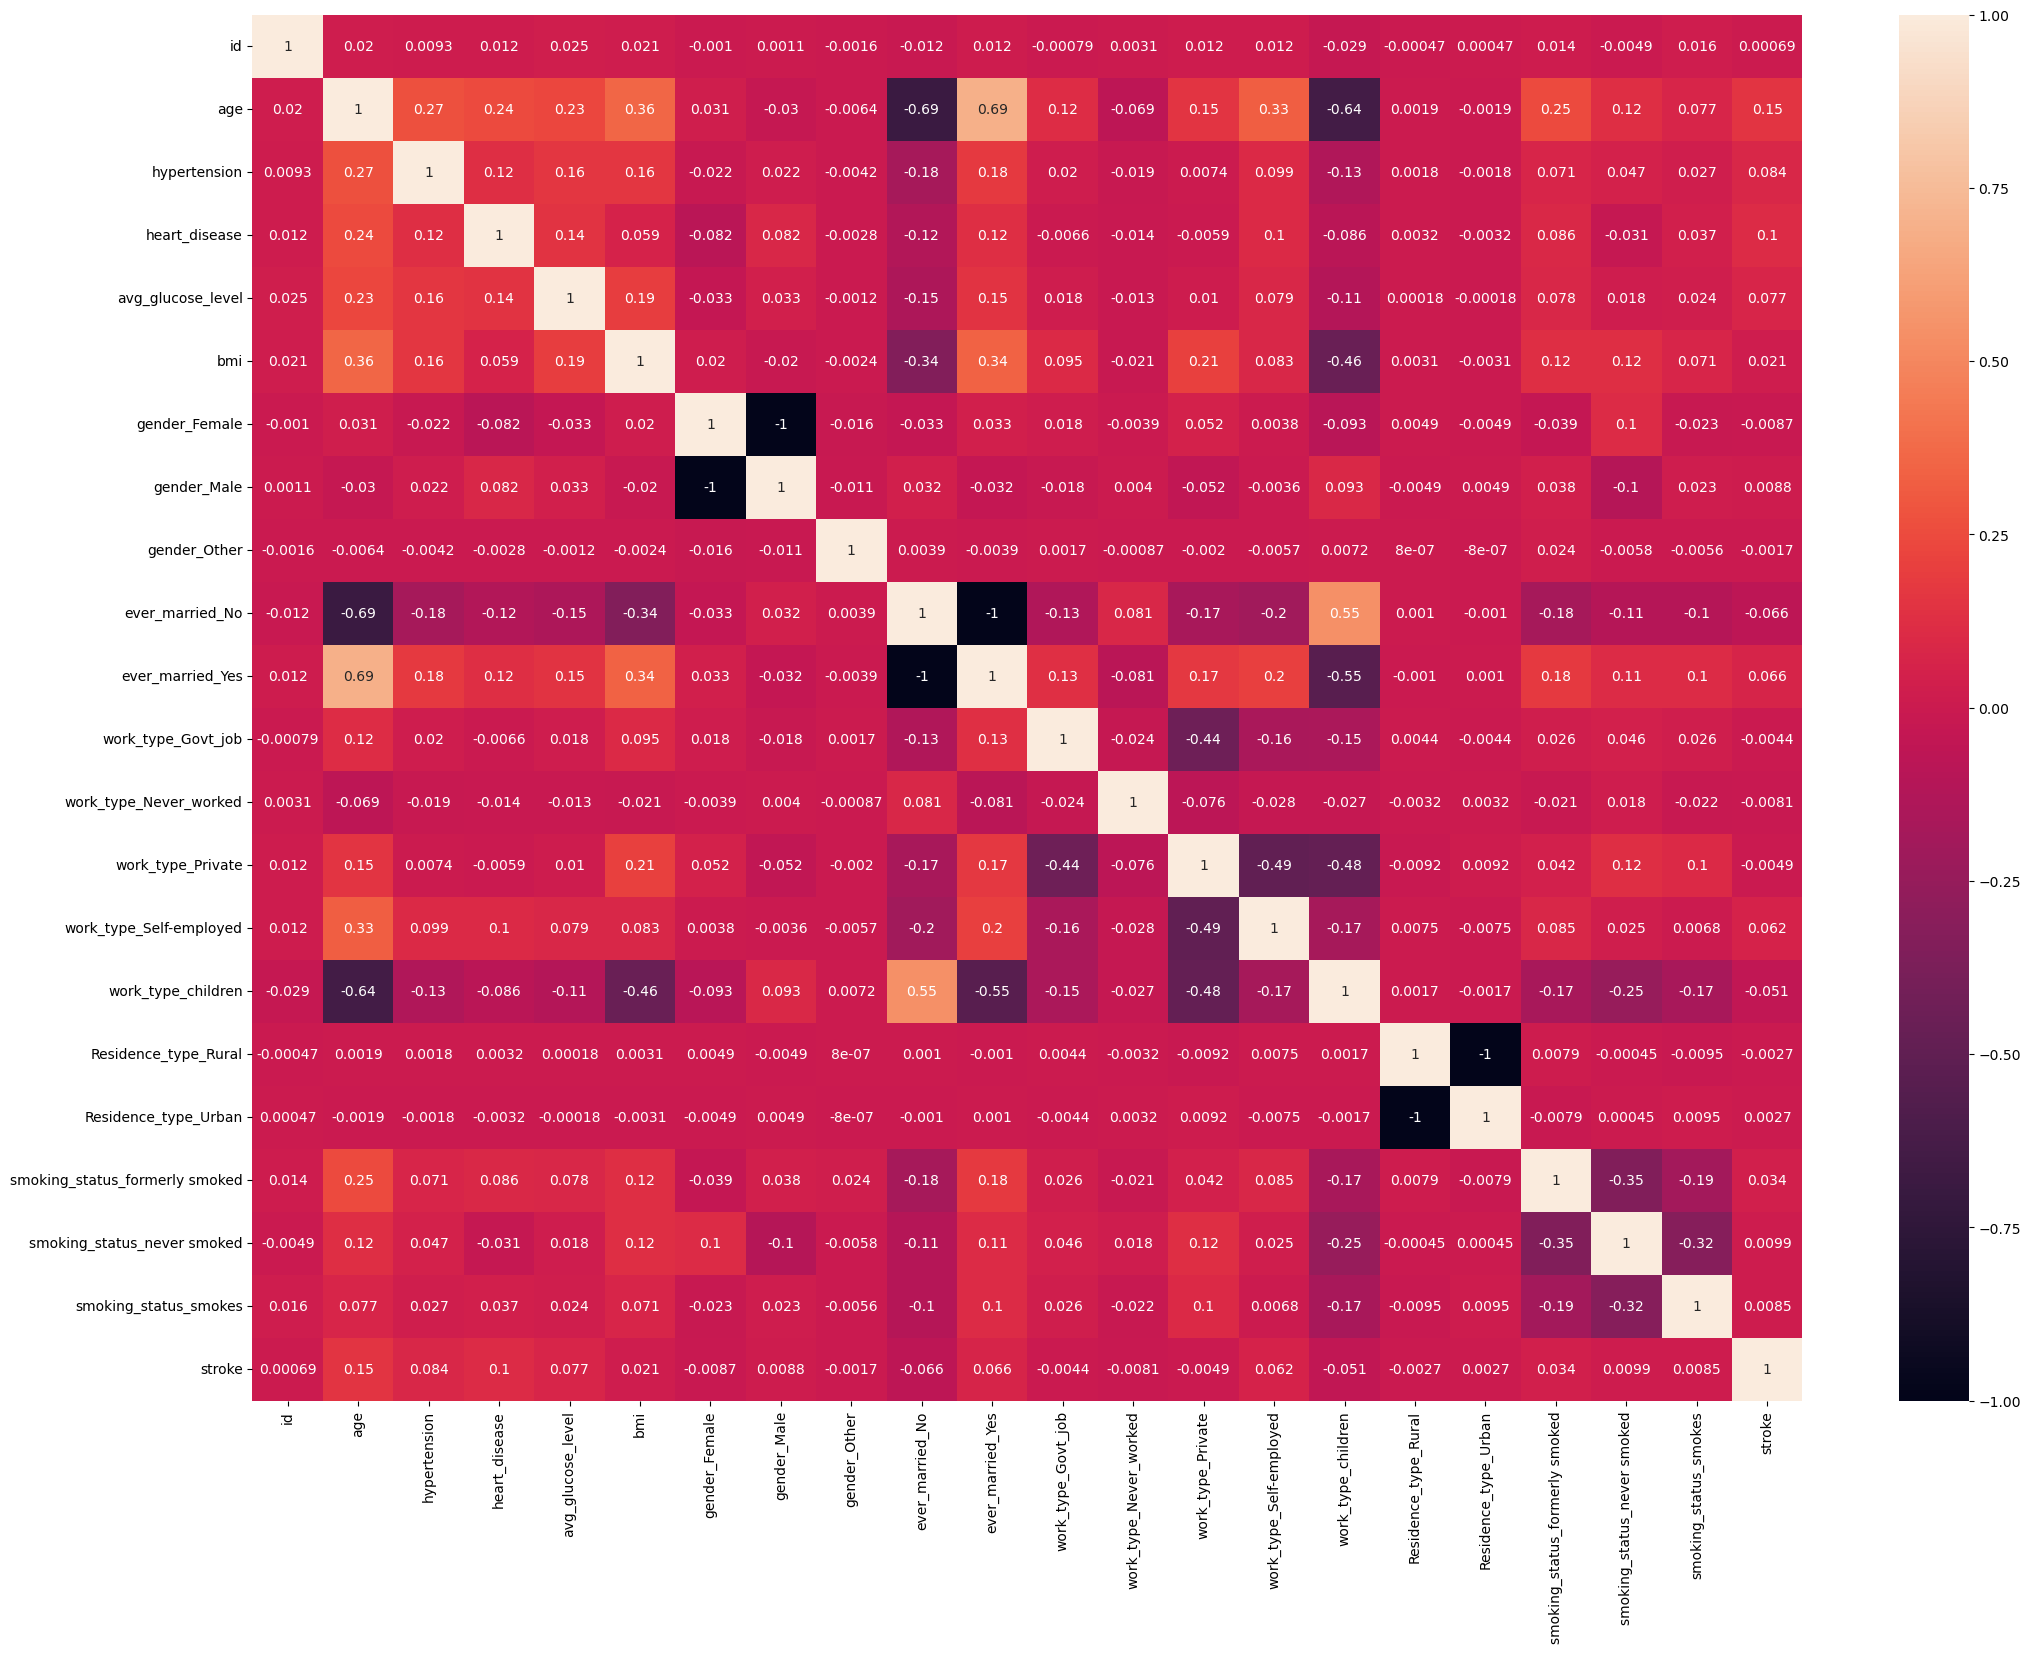

In [8]:
plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

We splitsen de categorische en numerieke kolommen om deze makkelijker te kunnen visualiseren

In [9]:
cat_cols = train.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1)
num_cols = train[['age', 'avg_glucose_level', 'bmi']]

c:\Users\jassa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


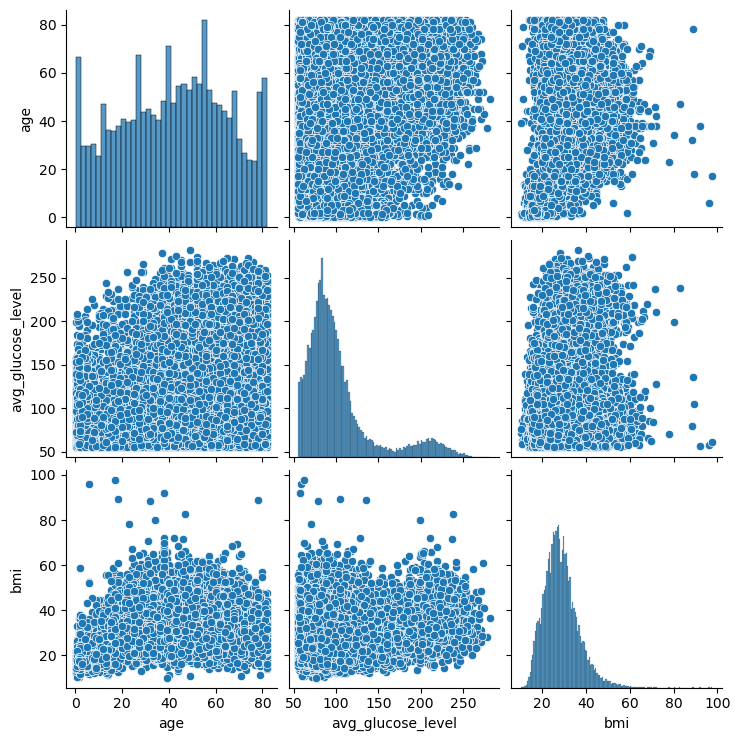

In [10]:
sns.pairplot(num_cols)
plt.show()

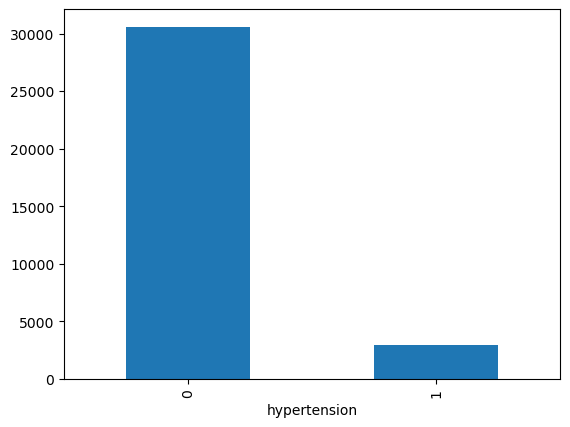

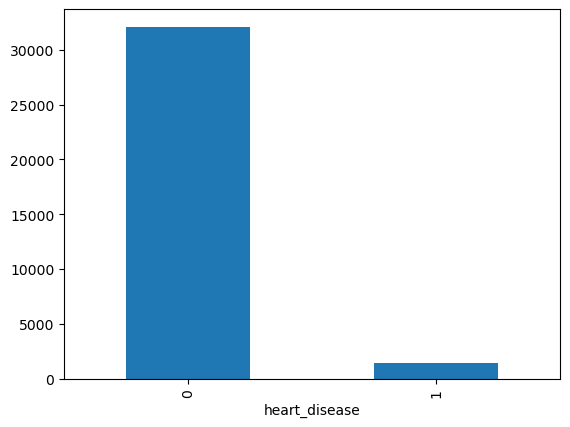

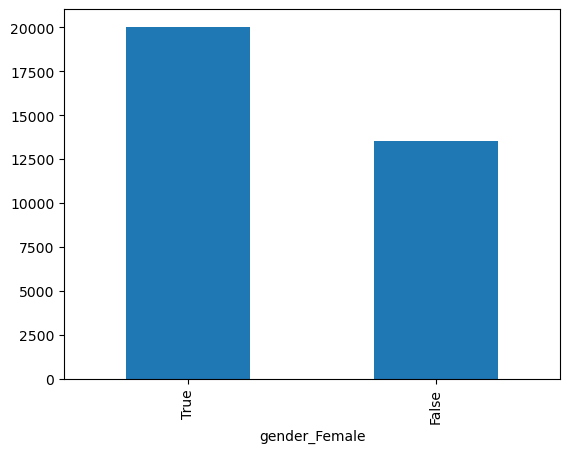

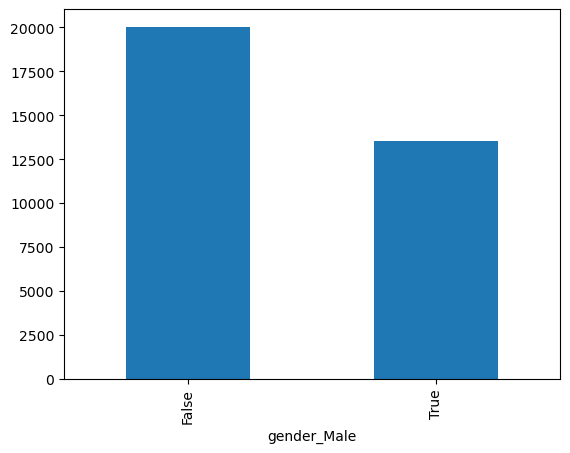

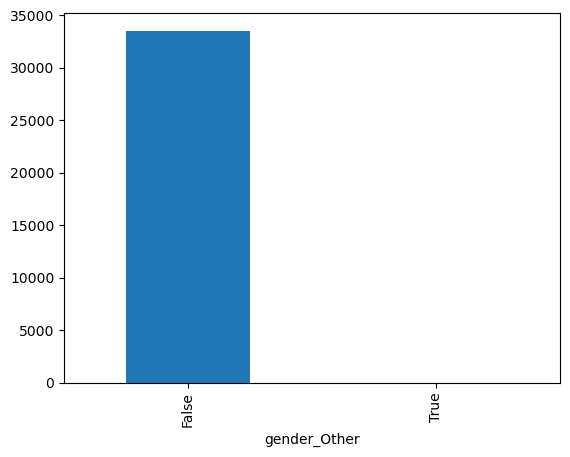

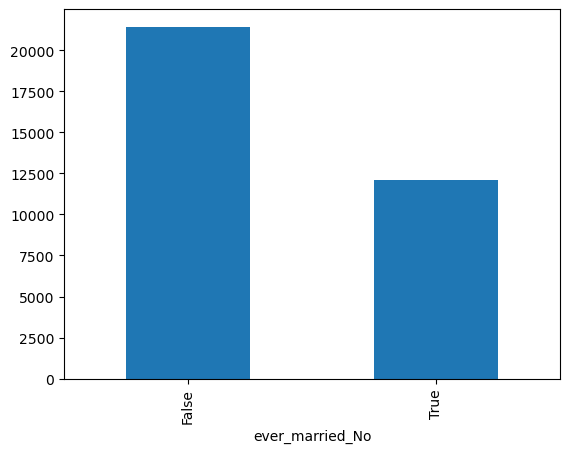

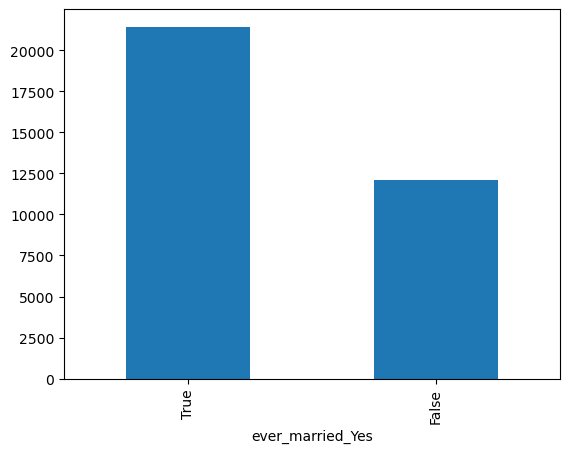

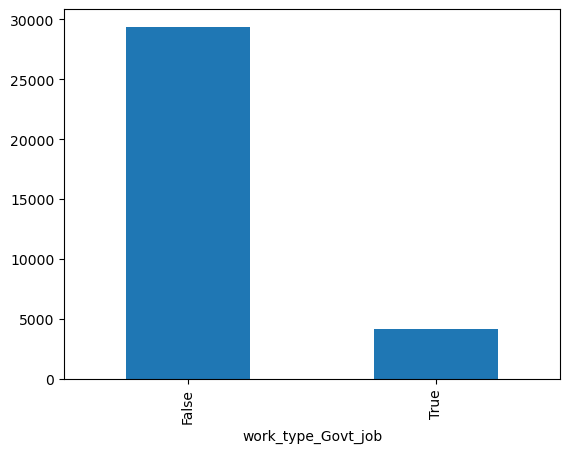

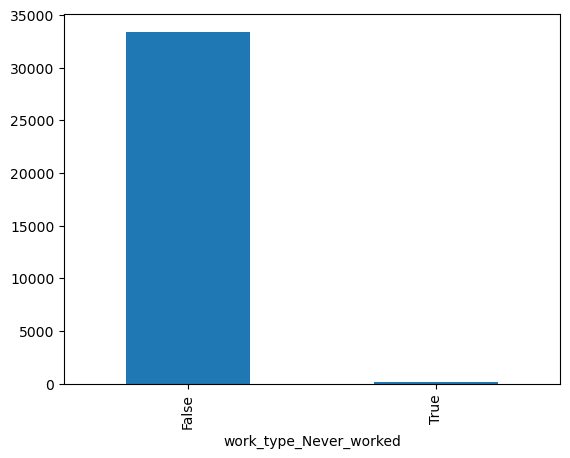

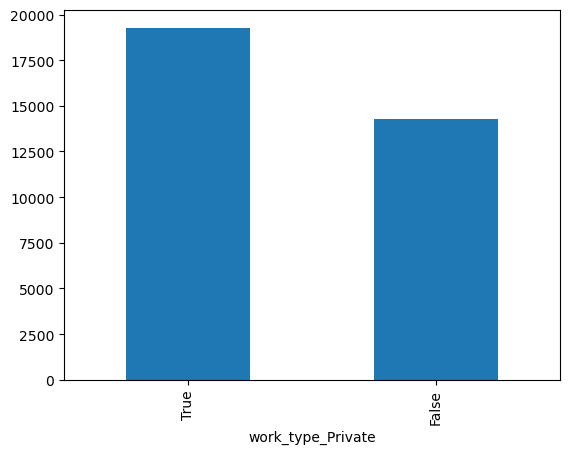

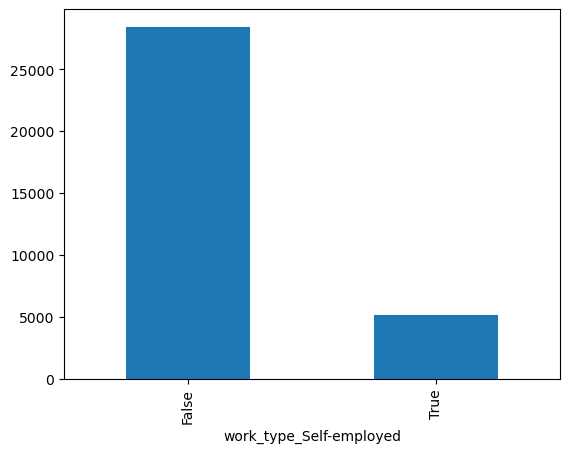

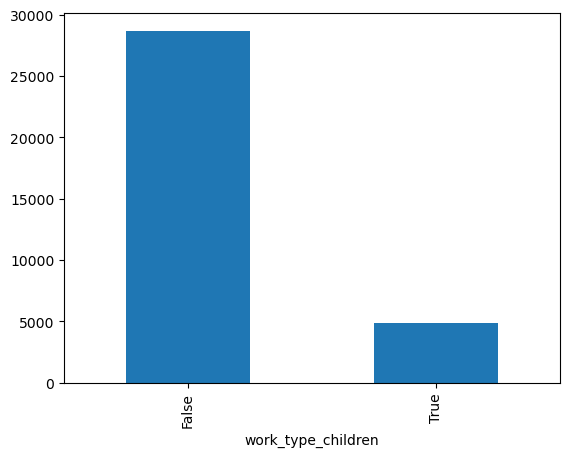

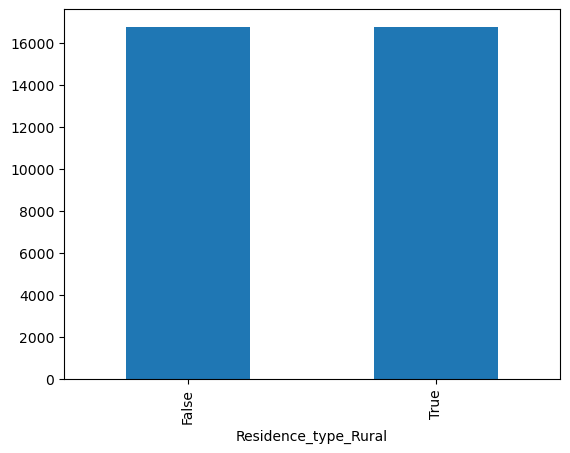

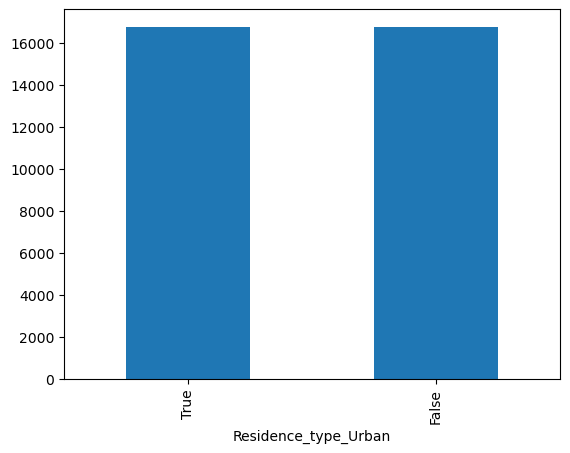

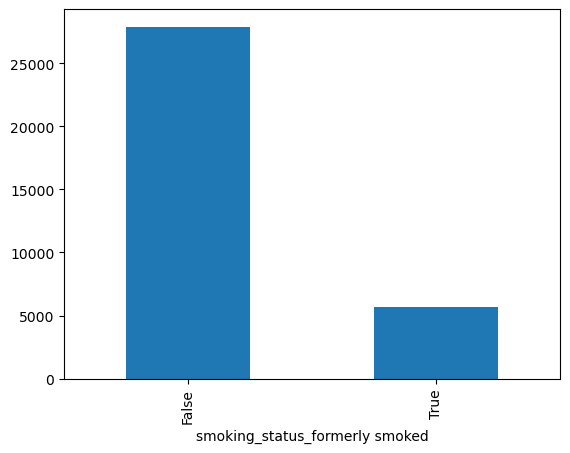

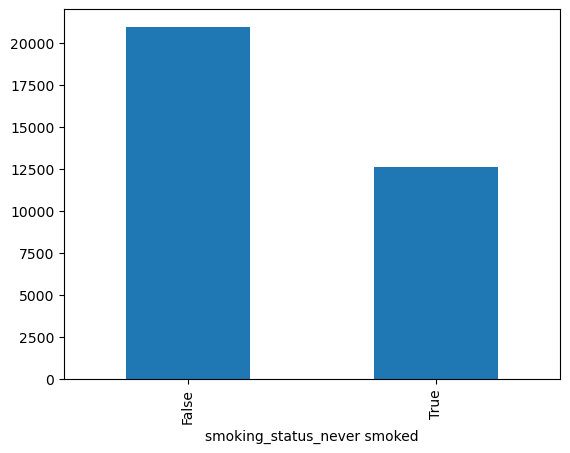

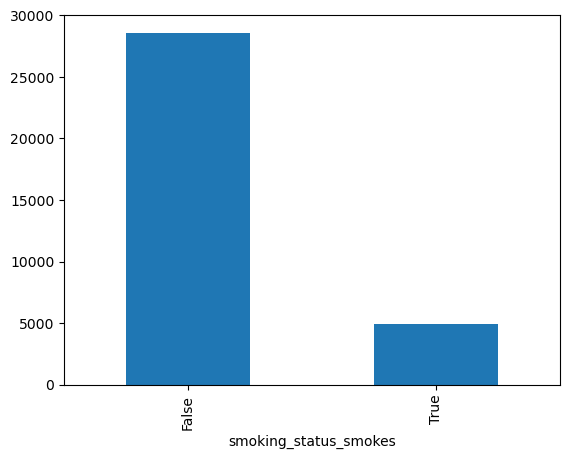

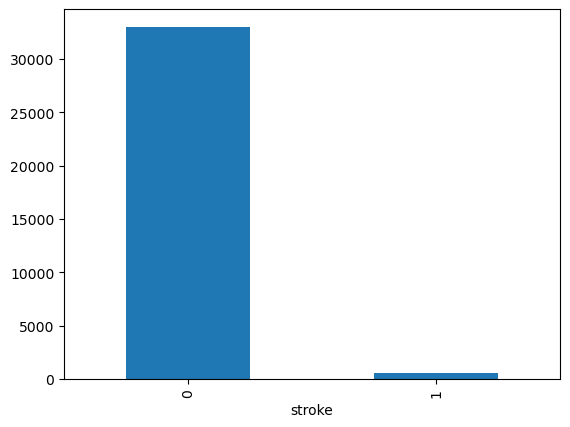

In [11]:
for i in cat_cols:
    train[i].value_counts().plot(kind='bar')
    plt.show()

We zien dat gender other zo weinig values heeft dat het niet eens weergeeft, het heeft zes 1 values, dit maakt het insignificant.

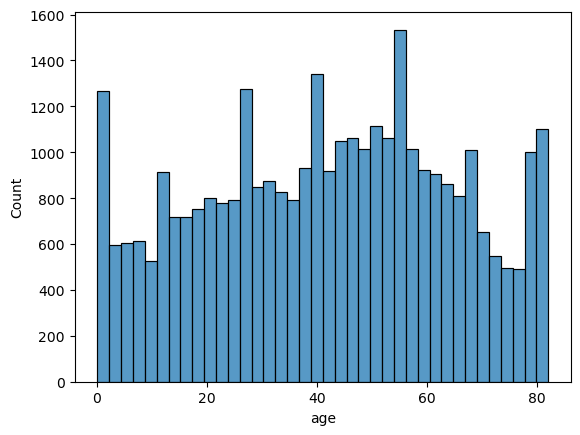

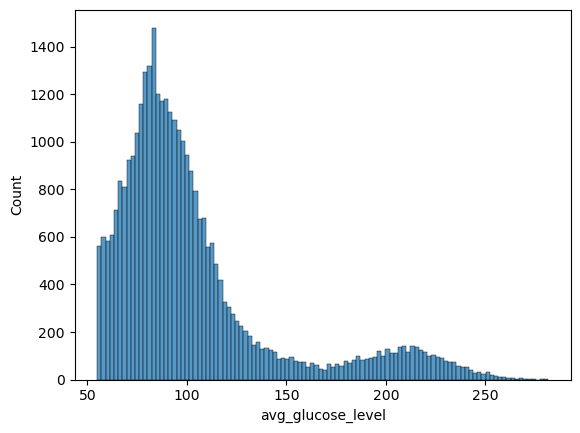

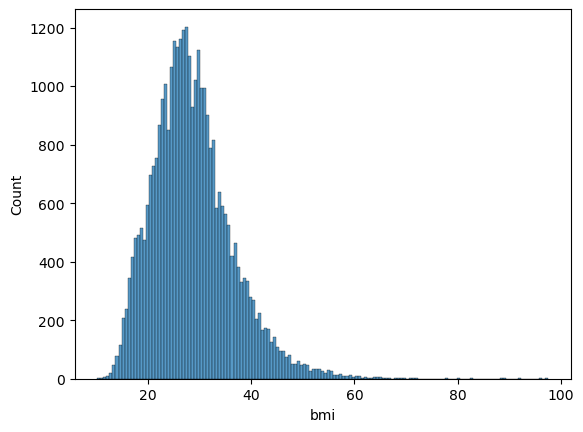

In [12]:
for i in num_cols:
    sns.histplot(x=train[i])
    plt.show()

We zien hier dat bmi een hele lang staart heeft, dus heel extreme outliers. Deze zullen met behulp van de Z-score worden verwijderd

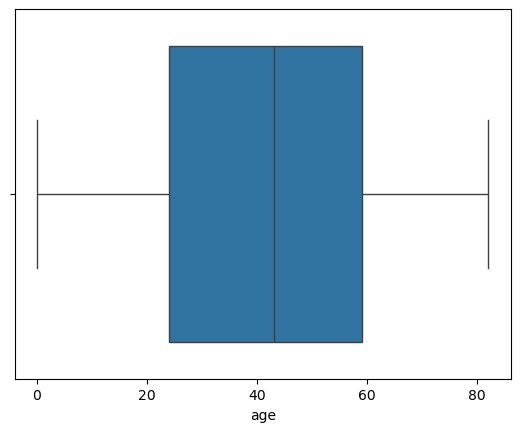

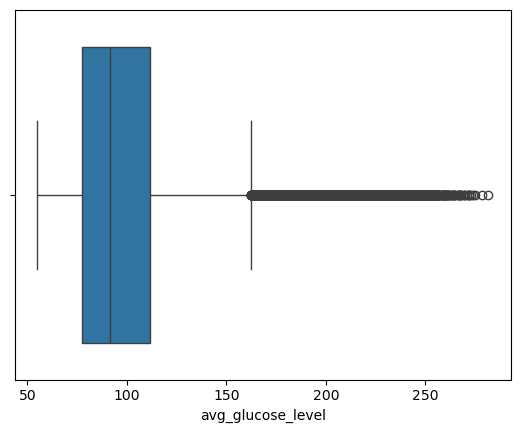

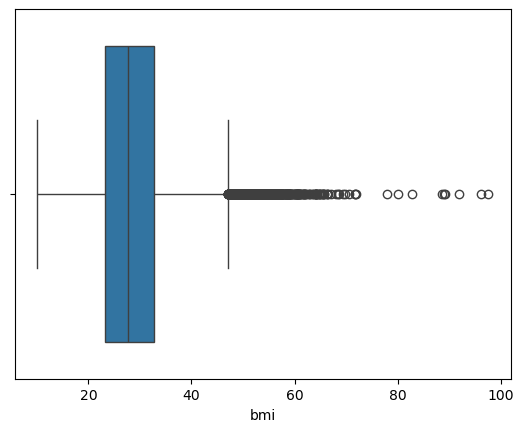

In [13]:
for i in num_cols:
    sns.boxplot(x=train[i])
    plt.show()

Ook hier zien we dan bmi extreme zeldzame uitliers heeft, deze zullen worden verwijderd met behulp van de z-score

### 1.3.1 Omgaan met outliers

bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn.

We bereken de Z-score en verwijderen hier dan de outliers

In [14]:
bmi_col = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(bmi_col))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen

In [15]:
train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,71911,9.0,0,0,109.80,14.5,False,True,False,True,...,False,False,False,True,True,False,False,False,False,0
33546,19648,47.0,0,0,88.61,30.8,True,False,False,False,...,False,True,False,False,False,True,False,False,False,0
33547,35550,3.0,0,0,89.68,16.2,True,False,False,True,...,False,False,False,True,True,False,False,False,False,0
33548,65453,56.0,1,0,82.44,27.8,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0


### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

We hebben gezien dat de dataset erg unbalanced is maar dat de dataset verder redelijk normaal is verdeeld. We hebben een paar zware outliers bij BMI gevonden en hoeveel deze misschien in werklijkheid wel kunnen zijn deze sterk genoeg om te verwijderen. Verder is er een probleem met multicollineariteit, er zullen hier kolommen verwijderd worden.

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

Zoals eerder gezegd worden de rijen die multicollineariteit veroorzaken verwijderd, ook de id kolom zal hier worden verwijderd.

We verwijderen de 'gender_Male' en 'gender_Other' kolommen. 'gender_Male' omdat we dit samenvoegen met de 'gender_female' kolom en hier gender van maken. Hier is 1 dan vrouw en 0 man. 'gender_other' wordt verwijderd omdat hier te weinig datapunten in zijn namelijk maar 6 van de 33206. 

Verder worden 'ever_married_No' en 'Residence_type_Rural' ook verwijderd en worden de verglijkbare kolommen een ja (1) of nee (0) kolom.

In [16]:

train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

In [17]:
train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,False,False,False,False,True,False,False,False,False,False,True,0
1,75.0,1,0,215.17,48.0,True,True,False,False,False,True,False,False,False,True,False,0
2,15.0,0,0,135.22,19.0,False,False,False,False,True,False,False,False,False,True,False,0
3,47.0,0,0,64.89,28.2,False,True,False,False,False,True,False,True,False,True,False,0
4,49.0,0,0,222.34,28.8,False,True,False,False,False,True,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33545,9.0,0,0,109.80,14.5,False,False,False,False,False,False,True,False,False,False,False,0
33546,47.0,0,0,88.61,30.8,True,True,False,False,True,False,False,True,False,False,False,0
33547,3.0,0,0,89.68,16.2,True,False,False,False,False,False,True,False,False,False,False,0
33548,56.0,1,0,82.44,27.8,True,True,True,False,False,False,False,True,False,False,True,0


Het zelfde wordt gedaan op de testset

In [18]:
test_data_ids = test['id']

In [19]:
test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

### 1.6 Data sampling indien nodig

We hebben te maken met een imbalanced data set, dit houdt in dat minstens één class veel vaker voorkomt dan de andere in ons geval is het aantal personen dat geen stroke heeft gehad en dus 0 value heeft, veel groter dan de mensen die dit wel hebben gehad. Om hier mee om te gaan gebruiken sampling methodes, hier kunnen we 3 dingen doen. Under samplen, dit haal een deel weg van de meerderheids klasse, of over samples dit maak meer data aan voor de minderheids klasse.

We hebben deze verschillende sampling methodes geprobeerd met de verschillende modellen, we gebruiken uiteindelijk de methode met de beste uitkomsten

In [20]:
X = train.drop(columns=['stroke'])
y = train['stroke']

## Smote

Smote of Synthetic Minority Oversampling Technique is een vorm van oversamplen, dit werkt door synthetische data aan te maken op basis van de al bestaande data. Het probeert zo een unbalanced data set weer balanced te maken. 

Het kiest een willekeurig voorbeeld uit de minderheids klasse en zoekt dan binnen een bepaalde K waarde naar de 'nearest neighbours'. Het kiest vervolgens een willekeurige uit deze selectie en plaatst een data punt hiertussen. Zo probeert het zo werkelijk mogelijke data aan te maken.

Brownlee, J. (2021, March 16). SMOTE for Imbalanced Classification with Python. MachineLearningMastery.com. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [21]:

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print(y_smote.value_counts())


stroke
0    32691
1    32691
Name: count, dtype: int64


## ADASYN

ADASYN of Adaptive Synthetic Sampling, is een oversampling techniek waar synthetische data wordt aangemaakt op basis van al bestaande data. ADASYN doet dit met behulp van het berekenen van dichtheidsverdeling van de minderheids klassen en genereerd dan data op basis hiervan.

What is Adaptive Synthetic Sampling (ADASYN). (n.d.). https://www.activeloop.ai/resources/glossary/adaptive-synthetic-sampling-adasyn/

In [22]:
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print(y_adasyn.value_counts())

stroke
0    32691
1    32529
Name: count, dtype: int64


## Instance Hardness Threshold

IHT is een undersampling techniek dat samples met een lage kans verwijderd uit de dataset. Het gebruikt dus een model om de probablity de te voorspellen dat een sample voorspeld wordt met een bepaalde klasse, vervolgens verwijderd IHT de uit de meerderheids klasse de moeilijkst te voorspellen samples. Hierdoor zou het model zowel beter moeten generaliseren en accurater zijn.

Dit werkt bijvoorbeeld beter voor SVMs omdat deze moeilijk te voorspellen klassen weghaalt en het daardoor makkelijker zou maken om de grenzen te maken voor de klasse

Sisters, L. (2022, March 30). Instance hardness threshold: an undersampling method to tackle imbalanced classification problems. Medium. https://towardsdatascience.com/instance-hardness-threshold-an-undersampling-method-to-tackle-imbalanced-classification-problems-6d80f91f0581

In [23]:
iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
X_iht, y_iht = iht.fit_resample(X, y)

print(y_iht.value_counts())

stroke
0    21711
1      515
Name: count, dtype: int64


### 1.7 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

Standaardiseren van de data zorgt ervoor dat de schaal overal gelijk is. Dit zorgt ervoor dat een kolom met een andere schaal niet veel te veel of veel te weinig invloed heeft op het model. Dit is vooral belangrijk voor afstandgebasseerde algoritmes zoals k-NN en SVM die we hier gebruiken. Voor Tree gebaseerde modellen of categorische variabelen is dit vaak niet nodig.

Jaadi, Z. (2023, August 4). When and why to standardize your data. Built In. https://builtin.com/data-science/when-and-why-standardize-your-data

In [24]:
sc = StandardScaler()

X_smote_sc = sc.fit_transform(X_smote)
X_adasyn_sc = sc.fit_transform(X_adasyn) 
X_ith_sc = sc.fit_transform(X_iht) 

Test set aanpassen

In [25]:
test = sc.fit_transform(test) 

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme

Het voorbeeld dat hier gebruikt wordt is een SVM model, deze wordt verder in het document uitgelegd

De metrics voor classificatie zijn: f1, recall, precision, accuracy

Zoals te zien in het classification report

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42) # 70% training and 30% test

svm_clf = svm.SVC(kernel='rbf', C=100)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)


print("F1 score:",metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

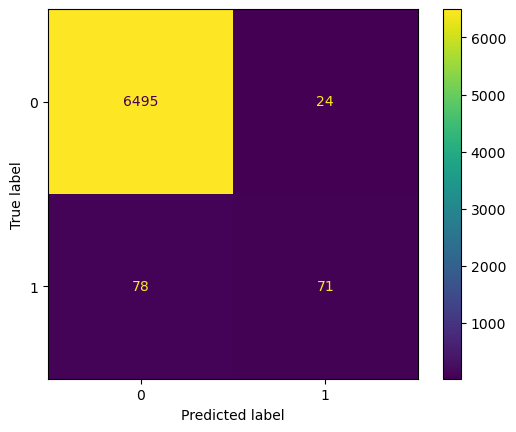

In [27]:
confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= [0,1])

cm_display.plot()
plt.show()

accuracy = ((True Positive + True Negative) / Total Predictions)  
accuracy = ((71 + 6495) / 6668)

Accuracy meet dus hoeveel procent er correct is voorspeld, dit is vooral een goede metric om te gebruiken als de dataset gebalanceerd is.

Precision = True Positive / (True Positive + False Positive)  
Precision = 71 / (71 + 24)

Precision meet hoeveel positieve predictions correct zijn, dit wordt dus gebruikt voor als je positieve predictions wilt optimaliseren.

Recall = True Positive / (True Positive + False Negative)  
Recall = 71 / (71 + 78)

recall meet hoeveel van de aanwezige positieve class die aanwezig zijn in de data ook werkelijk correct werden voorspeld. Hiermee wil je dus dingen identificeren die al gebeurd zijn.

f1 = True Positive / (True Positive + 1/2(False Positive + False Negative))  
f1 = 71 / (71 + 1/2(24 + 78))

f1 is de combinatie van precision en rcall.

Kundu, R. (2024, July 2). F1 Score in Machine Learning: Intro & Calculation. V7. https://www.v7labs.com/blog/f1-score-guide   
  
Malato, G. (2023, October 30). Precision, recall, accuracy. How to choose? | Your Data Teacher. Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/#:~:text=We%20use%20precision%20when%20we,us%20a%20great%20competitive%20advantage.

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

De F1 score wordt gebruikt als je zowel hoge precision als recall wilt hebben. Accuracy meet ook hoeveel er correct predict zijn, echter werkt dit alleen goed met balanced data sets. Precision meet hoeveel positieve predictions correct zijn en recall meet hoeveel van de aanwezige positieve class samples correct zijn geindentificeerd.

De ene metric komt dus te koste van de ander. De F1 score combineerd deze, hierdoor heb je minder last van de unbalanced dataset en kan je je model efficient optimaliseren.

Kundu, R. (2024, July 2). F1 Score in Machine Learning: Intro & Calculation. V7. https://www.v7labs.com/blog/f1-score-guide   
  
Malato, G. (2023, October 30). Precision, recall, accuracy. How to choose? | Your Data Teacher. Your Data Teacher. https://www.yourdatateacher.com/2021/06/07/precision-recall-accuracy-how-to-choose/#:~:text=We%20use%20precision%20when%20we,us%20a%20great%20competitive%20advantage.

# 3. Modelleren en uitleg modellen

## 3.1 KNN

In [52]:
rs = RobustScaler()
X_adasyn_rs = sc.fit_transform(X_adasyn)
X_train, X_val, y_train, y_val = train_test_split(X_adasyn_rs, y_adasyn, test_size=0.3, random_state=42)


knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [3]
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_prob = best_knn.predict_proba(X_val)[:, 1]
y_pred_custom_threshold = (y_prob >= 0.2).astype(int)
print("F1 Score", f1_score(y_val, y_pred_custom_threshold))
print("Classification Report:\n", classification_report(y_val, y_pred_custom_threshold))


test_prob = best_knn.predict_proba(test)[:, 1]

test_predictions = (test_prob >= 0.2).astype(int)

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
F1 Score 0.9778069865021991
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      9768
           1       0.97      0.99      0.98      9798

    accuracy                           0.98     19566
   macro avg       0.98      0.98      0.98     19566
weighted avg       0.98      0.98      0.98     19566



Kleine toelichting:
-   Functie predict_proba() 
    -   gebruikt om de waarschijnlijkheid voor stroke == 1 te verlagen naar 0.2, hierdoor krijgt een patient de classificatie stroke = 1 zodra de 'Probability' groter of gelijk is aan 20%, handmatig getest dat 0.2 het beste werkt op Kaggle. Ookal heeft 0.7 een hogere f1 score op de train set.
- ADASYN 
  - ADASYN genereert synthetische voorbeelden voor stroke = 1, het kijkt naar de minderheidsklasse (stroke = 1) en creeert nieuwe punten door de bestaande (stroke = 1) patienten te combineren met hun Neighbors --> nieuwe vergelijkbare punten onstaan tot dat er evenveel '1' waarden zijn dan '0' waarden in de kolom 'stroke'


#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

K-Nearest Neighbours (KNN) is een simpel algoritme die te gebruiken is voor classificatie en regressie problemen. Het werkt door de "K" nearest datapoints(Neighbors) voor een nieuwe punt te indentificeren op basis van een 'Afstand' hierover meer later. Een voorspelling word gedaan met gebruik van een meerderheidslabel (classification) of het gemiddelde (regression) van deze Neighbours.

Bij het gebruik van een KNN model is de afstand heel belangrijk en ook het aantal Neighbors omdat dit invloed kan hebben op de 'Fitting'

- Euclidean
  - Een rechte lijn tussen twee punten in een Euclidean space (multidimensionale ruimte) dit wordt gedaan met de formule:
$$
d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{ \sum_{k=1}^{n} (x_{ik} - x_{jk})^2 }
$$
  - Het werkt vooral goed in laag dimensionale ruimten omdat het verschil tussen punten minder betekenisvol zijn in hoge dimensies. Minder kolommen is dus beter voor Euclidean distance
- Manhattan
  - Manhattan distance is bekend als stadsblokafstand en daarom ook genaamd naar Manhattan omdat Manhattan van boven erg veel lijkt op de manier waarop de distance word berekent. In het kort ga je een afstand berekenen door een echte route te lopen in plaats van Euclidean die dwars door gebouwen heen gaat:
  - de formule:

$$d(P, Q) = |q_1 - p_1| + |q_2 - p_2|$$

Voor meer dan 2 dimensies:

$$d(P, Q) = \sum_{i=1}^{n} |q_i - p_i|$$

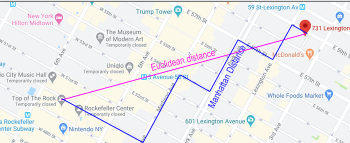

[source](https://www.translatorscafe.com/unit-converter/bg/calculator/two-points-distance/?D=2&x1=3&y1=3.5&x2=-5.1&y2=-5.2)
  - Deze afstand is de som van de absolute verschillen tussen punten in alle dimensies en wordt berekent met : 
  - Manhattan distance is minder gevoelig tegen multidimensionale ruimtes omdat het geen kwadraten berekent maar de absolute verschillen optelt.


- [Weights](https://visualstudiomagazine.com/articles/2019/04/01/weighted-k-nn-classification.aspx) [additional source](https://towardsai.net/p/l/understanding-k-nearest-neighbors-a-simple-approach-to-classification-and-regression)
  - Uniform(default)
    - Bij het gebruiken van Uniform als gewicht zorg je dat elk van de 'K' Neighbors evenveel bijdraagt aan het resultaat. Oftewel, een punt die dichtbij ligt heeft even veel invloed als een punt die ver ligt.
  - Distance
    - Bij het gebruiken van Distance als gewicht heeft de afstand van de 'K' Neighbors invloed op hoeveel het bijdraagt aan het resultaat. De afstand word berekent met  1/d  en d = afstand tot Neighbour. 
- Voorbeeld :

| Punt   | Klasse   | Afstand | Gewicht (Uniform) | Gewicht (Distance) |
|--------|----------|---------|-------------------|-------------------|
| Punt 1 | Klasse A | 5       | 1                 | 0.2               |
| Punt 2 | Klasse A | 7       | 1                 | 0.14              |
| Punt 3 | Klasse B | 1       | 1                 | 1.0               |

- Uniforme gewichten: Klasse A , want de som van de gewichten voor Klasse A (1+1) is groter dan die voor Klasse B (1).
- Afstandsgewichten: Klasse B , want de som van de gewichten voor Klasse A (0.2 + 0.14 = 0.34) is kleiner dan die voor Klasse B (1.0).


- ['K' Waarde](https://www.kdnuggets.com/2022/07/knearest-neighbors-scikitlearn.html)
  - De waarde van 'k' is van cruciaal belang voor de prestaties van het model. Een kleine 'k' kan leiden tot overfitting omdat het model hierdoor gevoelig wordt voor ruis, terwijl een grote 'k' de voorspellingen kan overdrijven en subtiele patronen kan negeren. Meestal worden oneven waarden van 'k' gekozen om verbanden in de classificatie te vermijden

KNN is makkelijk te impelemnteren en te begrijpen maar normaal gesproken gaan prestaties achteruit in hoogdimensionale datasets(in dit geval valt het mee). het schalen van functies zoals standaardisatie is vaak nodig om ervoor te zorgen dat de distance metrics nog meaningful zijn.
  
​


### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

**schaalverschillen tussen variabelen**
  
  bijvoorbeeld bij de waarden van glucose varieren van ongeveer 60 tot 200, terwijl BMI-waarden tussen 18 en 50 liggen. Zonder standaardisatie kan een variabele met grotere waarden, zoals glucose, zullen dus meer inpact hebben in de afstandsberekeningen. Dit betekent dat de KNN voornamelijk gebaseerd zal zijn op glucose, waardoor variabelen zoals BMI en leeftijd weinig impact hebben op het eindresultaat.
Dit zorgt ervoor dat alle variabelen op een vergelijkbare schaal zijn. Hierdoor kunnen bijv Glucose en BMI gelijk bijdragen aan de afstandsberekeningen.

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

  - Regularisatie is een manier om overfitting te voorkomen en om modellen te verbeteren, bij K-Nearest Neighbors kan je het toepassen door de complexiteit van het model aan te passen door bijvoorbeeld parameters zoals aantal neighbors of Weights te veranderen en optimaliseren.
    - 'k' Neighbors
      - een belangrijk manier om KNN te regulariseren is door het aantal neighbors(k) te kiezen. Dit bepaald hoeveel datapunten invloed hebben op een voorspelling, een klein 'k' betekent dat het model erg gevoelig is bij kleine variaties --> overfitting. Een groot 'k' maakt het model minder gevoelig en kan overfitting verminderen tot een limiet, zodra je een te hoog 'k' hebt kan leiden tot underfitting waardoor je patronen in data niet inrekent. 
    - Weights
      - Bij 3.1.1 al uitgebreidt uitgelegd met een voorbeeld, in het kort kan je ervoor kiezen of je alle Neighbors(k) gelijk laat wegen of te wegen op basis van hun afstand  tot het nieuwe punt. In 'Distance' Weight hebben neighbours die dichterbij liggen meer invloed op de voorspelling, dit helpt om invloed van minder relevante buren te verminderen.
    - Ik maak gebruik van GridSearchCV om de beste parameters voor mijn KNN model te vinden, hierbij gebruik ik verschillende parameters waaronder  Neighbors(k), Weights, Metric en 'p'
      - 'p' is belangrijk voor de metric Minkowski, een afstandsmaat die aan de hand van de waarde 'p' kiest waarbij de macht wordt verhoogd bij Manhattan distance. p=1 is bijvoorbeeld hetzelfde als Manhattan distance. In mijn geval werkt p = 3 het beste en de formule gaat als volgt: $D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^3 \right)^{1/3}$
        - Voorbeeld: Stel dat je twee punten hebt:  x = (2, 3, 5) en y = (4, 1, 6), dan wordt de Minkowski voor p = 3 als volgt berekend:

$$
D(x, y) = \left( |2 - 4|^3 + |3 - 1|^3 + |5 - 6|^3 \right)^{1/3}
$$

$$
D(x, y) = \left( 2^3 + 2^3 + 1^3 \right)^{1/3}
$$

$$
D(x, y) = \left( 8 + 8 + 1 \right)^{1/3}
$$

$$
D(x, y) = \left( 17 \right)^{1/3}
$$

$$
D(x, y) \approx 2.571
$$


## 3.2 Logistic Regression

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_smote_sc, y_smote, test_size=0.3, random_state=42)
logreg = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear')

param_grid = {'C': [0.01, 0.1, 1,],
              'penalty': ['l1', 'l2'],
              'max_iter': [100, 200, 300],
              'solver': ['liblinear'] #optimale keuzes voor binaire classificatie, andere parameters zijn geprobeerd
              }
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Beste hyperparameters:", grid_search.best_params_)

logreg.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_
logreg_pred = best_logreg.predict(X_test)

cr = classification_report(logreg_pred, y_test)
f1 = f1_score(logreg_pred, y_test)

print(cr, f1)

Beste hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10064
           1       0.89      0.92      0.90      9551

    accuracy                           0.91     19615
   macro avg       0.91      0.91      0.91     19615
weighted avg       0.91      0.91      0.91     19615
 0.9049904525984415


### 3.2.1 Leg uit hoe het model werkt

Bij Logistic Regression wordt er gebruik gemaakt van de verschillende features om een class te voorspellen. Net zoals bij Lineaire Regressie wordt er aan de hand van een standaard functie (z=w1​⋅x1​+w2​⋅x2​+b etc.) een voorspelling gedaan. Deze z-waarde kan heel erg variëren van een klein tot groot getal. Doordat je hiermee lastig een class kan voorspellen wordt het met behulp van de sigmoid functie omgezet in een getal tussen de 0 en 1. Als de z-waarde hoog is, zal het getal dat uit de sigmoid functie komt richting de 1 gaan en als de z-waarde laag is richting de 0 gaan. 
Certainly! Here’s the sigmoid function written purely in Markdown:


$$sigma(x) = \frac{1}{1 + e^{-x}}$$

Het getal dat uit de sigmoid functie komt is als volgt te interpreteren:
-Als het groter is dan 0.5 wordt er "1" als class voorspelt.
-Als het kleiner is dan 0.5 wordt er "0" als class voorspelt.

Kort samengevat wordt er dus een lineaire vergelijking gebruikt om een getal te berekenen en wordt de sigmoidfunctie gebruikt om het om te zetten naar een bepaalde kans (tussen 0 en 1) voor classificatie. 

GeeksforGeeks. (2024, June 20). Logistic regression in machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/


Banoula, M. (2024, August 30). An Introduction to logistic regression in Machine learning. Simplilearn.com. https://www.simplilearn.com/tutorials/machine-learning-tutorial/logistic-regression-in-python

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

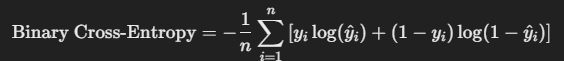

De binary cross-entropy of log loss meet hoe onzeker je model is over de juiste classificatie. Hoe lager de verliesfunctie, hoe beter het model de data classificeert. Het gebruik van deze functie leidt tot goede probabilistische voorspellingen.

In deze functie:
- n het aantal voobeelden in je dataset.
- yi het werkelijke label van het i-de datapunt (0 of 1).
- y met het dakje de voorspelde kans.

GeeksforGeeks. (2024, May 27). Binary Cross Entropy/Log loss for binary classification. GeeksforGeeks.
https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

Gradient descent is een optimalisatie-algoritme dat wordt gebruikt om de parameters van een model te minimaliseren, zoals in logistische regressie. Het werkt door iteratief de waarden van de parameters bij te werken in de richting van de negatieve gradient van de verliesfunctie.
 
De loss functie meet de het verschil tussen de werkelijke y en de voorspelde y op de huidige positie. Zo kan het model de parameters aanpassen en lere om de error te minimaliseren. Het doet dit iteratief langs de steilste helling, tot het punt waar de functie zo dicht bij of nul is.

$$L(y, \hat{y}) = -\left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)$$






Tokuç, A. A. (2023, May 12). Gradient descent equation in logistic regression. Baeldung.
https://www.baeldung.com/cs/gradient-descent-logistic-regression

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

Dit zijn de vormen van regularisatie die van toepassing zijn op dit model:
- L1-regularisatie (Lasso): Deze vorm heeft de kracht om bepaalde coëfficiënten naar 0 te dwingen, dit leidt dan tot een model dat alleen relevante kenmerken tot zijn beschikking heeft. Hierdoor kan de kostenfunctie verlaagt worden en de interpretatie van het model makkelijker gemaakt worden. Wat feature selection betreft kan L1-regularisatie helpen bij het onderscheiden van relevante en irrelevante kenmerken en dan de relelvanten selecteren.
- L2-regularisatie (Ridge): Wat L2-regularisatie doet is een starfterm toevoegen aan de kostenfunctie die gelijk is aan de grootte van de coëfficiënten in het kwadraat, wat kan helpen bij het stabiliseren van de schattingen van de coëfficiënten.
- elasticnet: Elasticnet is een combinatie van L1 en L2

Code Labs Academy. (2024, June 5). Inzicht in L1 en L2 regularisatie: Belangrijkste strategieën om overfitting in modellen voor machinaal leren te voorkomen.
https://codelabsacademy.com/nl/blog/the-role-of-l1-and-l2-regularization-in-preventing-overfitting-and-enhancing-model-generalization

Formules:
- L1:
 
  $$\lambda \sum_{j=1}^{n} |w_j|$$




  Bij L1 is de totale verliesfunctie: VerliesfunctieL1 = Originele verliesfunctie + R(w)
- L2:
 
  $$\lambda \sum_{j=1}^{n} w_j^2$$

  Bij L2 is de totale verliesfunctie: VerliesfunctieL2 = Originele verliesfunctie + R(w)
 
 ChatGPT. (2024, October 13). https://chatgpt.com/share/670c2dac-2944-800c-9186-e82329a4dc99


### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

Bij het gebruik van regularisatie wordt overfitting verminderd, maar op verschillende manieren. Het gebruik van L1-regularisatie kan leiden tot een eenvoudiger model met minder kenmerken, terwijl L2 geen kenmerken weg laat wat leidt tot een robuustere schatting.

Code Labs Academy. (2024, June 5). Inzicht in L1 en L2 regularisatie: Belangrijkste strategieën om overfitting in modellen voor machinaal leren te voorkomen.
https://codelabsacademy.com/nl/blog/the-role-of-l1-and-l2-regularization-in-preventing-overfitting-and-enhancing-model-generalization

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

Aan de hand van de grid search die op het model toegepast is zijn de beste hyperparameters voor de f1-score C=1, max_iter=100, penalty='l2', en solver='liblinear'. De f1-score die daar uitkwam is, afgerond op twee decimalen 0.90

## 3.3 SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42)

svm_clf = svm.SVC(kernel='rbf', C=100, probability=True)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)


print("F1 score:",metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

Een SVM werkt door data in kaart te kunnen brengen op in een hogere dimensie. Stel je een grafiek voor waar een lijn doorheen gaat om de classes te bepalen, een svm kan hier extra dimensies aan toevoegen waardoor het bij 1 extra bijvoorbeeld een vlak wordt.

Kernels zijn functies die overeenkomst tussen datapunten in een hogere dimensie meten, zelfs als de data in een logere dimensie is. Zo kan een svm complexere data classificeren die niet lineair te scheiden zijn.

Zo hebben we bijvoorbeeld de lineaire kern voor lineair scheidbare data, de polyoomkern voor een gekromde grens en de RBF kern voor complexe grenzen.

De lineaire kernel is de eenvoudigste kernel en is geschikt voor lineair scheidbare data:

$$K(x, x') = x \cdot x'$$

Stel dat 

$$x = [1, 2] en x' = [3, 4]$$

dan is:
$$K(x, x') = 1 \cdot 3 + 2 \cdot 4 = 3 + 8 = 11$$


De polynomiale kernel kan kromme beslissingsgrenzen modelleren en is nuttig bij niet-lineaire scheidingen:

$$K(x, x') = (x \cdot x' + c)^d$$

waar ( c ) een constante is en ( d ) de graad van de polynoom.

$$x = [1, 2],  x' = [3, 4] ,  c = 1 ,en (d = 2)$$

Dan is:

$$K(x, x') = (1 \cdot 3 + 2 \cdot 4 + 1)^2 = (3 + 8 + 1)^2 = 12^2 = 144$$

De **RBF kernel** is krachtig voor zeer complexe en niet-lineaire patronen. De formule is:

$$K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)$$

waar 

$$ \|x - x'\|^2$$

de Euclidische afstand tussen ( x ) en ( x') is en sigma de spreiding (standaardafwijking) van de Gaussische functie.

Voorbeeld: Stel 
$$ x = [1, 2] ,  x' = [3, 4] , en ( \sigma = 1 )$$

De Euclidische afstand 
$$\|x - x'\|$$



is:

$$\|x - x'\|^2 = (1 - 3)^2 + (2 - 4)^2 = (-2)^2 + (-2)^2 = 4 + 4 = 8$$



De RBF kernel is dan:

$$K(x, x') = \exp\left(-\frac{8}{2 \cdot 1^2}\right) = \exp(-4) \approx 0.0183$$


Hier is de kernel trick een techniek om product tussen data te berekenen in de hogere dimensie zonder ze daarheen te transformeren. In plaats van transformmeren passen we de kernel functie direct toe, dit vereist dan minder geheugen en is sneller. Dit maakt stelt het model in staat om met complexe patronen in data te werken en wiskundig in een eenvoudiger dimensie opereren.

Kort samengevat kun je met behulp van kernelfuncties datsets die niet lineair seperabel zijn omzetten in een andere dimensie om deze wel lineair seperabel te maken. 

Wilimitis, D. (2021, December 7). The kernel trick in support vector classification - towards data science. Medium. https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f


ChatGPT - Kernels and kernel trick. (n.d.). ChatGPT. https://chatgpt.com/share/6723cb59-81c0-8002-b1ce-7630de9a4d1d

### 3.3.2 De wiskundig formule voor de loss functie en de regularisatie

$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i f(\mathbf{x}_i))$$


### Toelichting: 
1. **L2 Regularisatie** 

$$\left(\frac{1}{2} ||\mathbf{w}||^2\right)$$

   - Dit zorgt voor kleine gewichten, het maximaliseerd de marge tussen de 2 classes. Een kleinere ||w|| betekent een kleinere marge, dit zorgt voor meer generalisatie en minder overfitting.


2. **C Parameter of "Soft Margin Regularisatie" (C=100)**:
   - Een hoge C waarde (in dit geval, 100) betekent dat het model een hogere nadruk legt op het minimaliseren van foute classificaties.
   - Dit zou kunnen leiden to overfitten als het model te goed leert te werken op de trainingdata, dit komt doordat de 'decision boundary' te complex wordt om te generaliseren. In ons geval werkt dit nog vrij goed.

3. **Hinge Loss** 

$$\left(\max(0, 1 - y_i f(\mathbf{x}_i))\right)$$


   - De hinge loss zorgt er voor dat de punten die correct geclassificeerd zijn buiten het marge geen loss toevoegen.
   - Als een punt binnen de marge of fout geclassificeerd is, groeit de loss exponentieel in proportie met hoe fout die is.



Fan, S. (2018, May 7). Understanding the mathematics behind Support Vector Machines. Shuzhan Fan. https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/  
  
ChatGPT - SVM RBF Kernel Formula. (2024, October 13). ChatGPT. https://chatgpt.com/share/670bba5a-2a54-8002-9133-d3c2f70836be

### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [ ]:
param_grid = {'kernel': ['rbf'], #andere parameters geprobeerd, rbf duidelijk beste kernel
              'C' : [0.1, 1, 10, 50, 100, 150,],
              'class_weight': ['balanced', None],
#              'degree': [1, 2, 3], alleen relevant voor polynominal
#              'gamma': ('scale', 'auto', 0.0001, 0.001, 0.01, 0.1, 1, 10), #default is beste
              'probability': [True] # Moet aanstaan voor probability berekeningen
#              'decision_function_shape': [ 'ovo', 'ovr'], Maakt niet uit voor binary probleem
#              'break_ties': [True, False] geen multiclass probleem dus niet relevant
              }

grid_dt = GridSearchCV(svm.SVC(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_svm = grid_dt.best_estimator_
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

#y_proba = best_svm.predict_proba(X_test)[:,1]
#y_predi_custom_threshold = (y_proba >= 0.5).astype(int)
print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))


Best hyerparameters:
 {'C': 100, 'class_weight': None, 'kernel': 'rbf', 'probability': True}
F1 Score 0.5819672131147541
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



## 3.4 Decision Tree

### 3.4.1 Beschrijf de werking van dit model

Een decision tree is een model die op basis van een boomdiagram een class voorspelt. Dit wordt gedaan door middel van een reeks beslissingen. Elke "node" boom stelt een vraag over een feature van de data en op basis daarvan ga je een stap verder in de beslisboom. Dit gaat zo door tot je uiteindelijk bij de leafes van de boom komt die de voorspeelde uitkomst / class aangeven.

### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

Bij een decision tree is het van cruciaal belang dat er wordt bepaald op welke features er gesplitst moet worden en hoe deze vervolgens gemaakt moeten worden. Dit wordt gebaseerd op verschillende maatstaven. Twee opties zijn:

**Information gain:**

Entropie meet de mate van onzuiverheid in de data. Het geeft aan hoe gevarieerd de klassen zijn in een dataset.

Als de dataset puur is (alle voorbeelden behoren tot dezelfde klasse), is de entropie laag (0). Als de dataset perfect gemengd is (gelijke aantallen voorbeelden van elke klasse), is de entropie hoog (maximaal).

Information gain is het verschil in entropie voor en na het splitsen van de data op een bepaald kenmerk. Het geeft aan hoeveel informatie je "wint" door die specifieke splitsing te maken. Als het de information gain hoger is, is het beter om op dit model te splitsen.

In elke stap van het bouwen van de decision tree, wordt voor elk kenmerk de information gain berekend. Het kenmerk met de hoogste information gain wordt gekozen om de data op te splitsen, omdat het de grootste vermindering in entropie geeft. Dit blijft worden gedaan tot er uiteindelijk geen nieuwe splitsingen meer kunnen worden gemaakt (of als er geen verbetering in het model meer mogelijk is)

**Gini Impurity:**

De Gini-Impurity is nog een maatstaf die vaak wordt gebruikt om te bepalen welke splitsing het beste is bij het bouwen van een decision tree classifier. In plaats van dat er entropie wordt gebruikt, meet deze maatstaaf de kans dat een willekeurig gekozen voorbeeld onjuist zou worden geclassificeerd op basis van de verdeling van de klassen in de dataset.

Bij elke stap van het proces van een decision tree wordt de Gini-Impurity voor elk mogelijke splitsing berekend. Vervolgens kiest het model de splitsing die de grootste reductie in Gini-Impurity oplevert. Dit houdt in dat de data na elke splitsing zuiverder wordt. Bij elke stap in het bouwproces van een decision tree berekent het algoritme de Gini-impurity voor de huidige

Ook dit proces wordt herhaald voor elke stuk van de data, waarbij de boom steeds verder wordt opgesplitst totdat de Gini-impurity voor de "leafs" laag genoeg is of totdat er geen verdere splitsingen meer nodig zijn.

Kaushik, A. (2023, June 18). Gini Impurity and entropy for decision tree - Arpita Kaushik - medium. Medium. https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1  
  
Zhou, V. (2019, June 7). A simple explanation of information gain and entropy. victorzhou.com. https://victorzhou.com/blog/information-gain/  
  
Zhou, V. (2019, March 29). A simple explanation of Gini impurity. victorzhou.com. https://victorzhou.com/blog/gini-impurity/  
  


### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_sc, y_smote, test_size=0.3,random_state=42)

dt = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], # Beide 'criterions' proberen
              'splitter': ['best', 'random'], # Manieren van splitsen
              'max_depth': [1,4,8,16], # Maximale diepte van de tree
              'min_samples_split': [2, 5, 10, 20], # Minimaal aantal samples om door te splitsen
              'min_samples_leaf': [2, 3, 5, 10], # Minimaal aantal samples in een leaf
              'max_features': [None, 'sqrt', 'log2']} # Manieren om features uit te kiezen
dt_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_cv.fit(X_train, y_train) 

dt_cv.best_params_, dt_cv.best_score_

({'criterion': 'entropy',
  'max_depth': 16,
  'max_features': None,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'splitter': 'best'},
 0.9601531380644136)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_smote_sc, y_smote, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 5, min_samples_split = 2, min_samples_leaf = 10, max_leaf_nodes = 10, max_features = None, ccp_alpha=0.001, class_weight={0: 1, 1: 58}, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Decision_pred = dt.predict(test)
Decision_pred_df = test_data_ids.to_frame()
Decision_pred_df['stroke'] = Decision_pred
Decision_pred_df.to_csv('Decision_pred_v12.csv', index=False)
#Beste kaggle score tot nu toe: 0.04147 (met smote)
#dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 16, min_samples_split = 2, min_samples_leaf = 1, max_features = 12, random_state=42)
print(classification_report(y_test, y_pred))


F1 Score: 0.7484470866201746
              precision    recall  f1-score   support

           0       1.00      0.33      0.49      9789
           1       0.60      1.00      0.75      9826

    accuracy                           0.66     19615
   macro avg       0.80      0.66      0.62     19615
weighted avg       0.80      0.66      0.62     19615



### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

Pruning is een techniek die wordt gebruikt om decision trees te vereenvoudigen en overfitting te voorkomen. Een model is overfit wanneer het te goed past op de trainingsdata, maar slecht resulteert / generaliseert op nieuwe data. Bij pruning worden overbodige delen van de decision tree die weinig of geen toegevoegde waarde hebben voor de voorspelling verwijdert. Dit vereenvoudigt het model, zodat het beter presteert op nieuwe data en dus minder zal overfitten.

In ons model maken we gebruik van pre-pruning. Dit betekent het "groeiproces" van de boom vroegtijdig wordt gestopt, voordat de boom volledig is gesplistst. Dit hebben we gedaan aan de hand van vooraf bepaalde parameters (die we hebben berekend met de gridsearch).

De methoden die wij hebben gebruikt zijn:

-Max_depth: Het proces stopt wanneer de boom een bepaalde diepte bereikt. Diepere bomen kunnen overfitting veroorzaken, dus een maximale diepte beperken voorkomt dit.
-Min_samples_split: dit is het aantal samples dat minimaal nodig is om een "node" te splitten. Bij te weinig samples zal de tree dus neit verder doorgroeien.
-Min_samples_leaf: het minimaal aantal samples dat een "leaf" moet hebben. Ook dit help met de grootte van de decision tree.

Relatie tussen Pruning en Underfitting / Overfitting:

Overfitting: een decision tree is overfit, wanneer het teveel leert van de trainingsdata en dus slecht generaliseert op nieuwe data. Door middel van pre-pruning wordt overfitting vermindert, door de bovenstaande technieken toe te passen.

Underfitting: het kan ook zo zijn dat je een model underfit door gebruik te maken van pre-pruning. Als je niet een gridsearch doet en dus niet de juiste parameters gebruikt bij het trainen van een model, kan het zijn dat je het model te simpel maakt en het dus niet in staat is om dingen goed te voorspellen.

Jain, A. (2024, September 14). Pre-Pruning and Post-Pruning in Decision Trees: A Comprehensive guide. Medium. https://medium.com/@abhishekjainindore24/pre-pruning-and-post-pruning-in-decision-trees-a-comprehensive-guide-391fd3682883  
  
DecisionTreeClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html  
  


## 3.5 Ensembles  (Random Forest, Gradient Boosted, Decistion Trees en XGboost)

### 3.5.1 Random Forest

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_sc, y_adasyn, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [1,5,10],'criterion': ['gini', 'entropy'], 'max_depth': [5,10,15], 'min_samples_split': [2,3,4], 'min_samples_leaf': [2,3,4], 'max_features': ['sqrt', 'log2']}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train) 

rf_cv.best_params_, rf_cv.best_score_

({'criterion': 'gini',
  'max_depth': 15,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 10},
 0.9681910549928562)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_sc, y_adasyn, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=15, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_samples=None, bootstrap=True, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
rf_pred = rf.predict(test)
rf_pred_df = test_data_ids.to_frame()
rf_pred_df['stroke'] = rf_pred
rf_pred_df.to_csv('rf_pred_12.csv', index=False)
#rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=15, min_samples_split=2, min_samples_leaf=2, max_features='sqrt'. random_state=42)
#Beste kaggle score tot nu toe: 0.04503 (Adasyn Sampling)

F1 Score: 0.8244026907909998
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      9768
           1       0.76      0.91      0.82      9798

    accuracy                           0.81     19566
   macro avg       0.82      0.81      0.80     19566
weighted avg       0.82      0.81      0.80     19566



### 3.5.2 Gradient Booster

In [40]:
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_sc, y_adasyn, test_size=0.3, random_state=42)

gbc = GradientBoostingClassifier(random_state=42)
param_grid = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.1,1], 'n_estimators': [1,3,7,10],'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [1,4,8,10], 'max_features': ['sqrt']}
gbc_cv = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
gbc_cv.fit(X_train, y_train) 

gbc_cv.best_params_, gbc_cv.best_score_


({'criterion': 'friedman_mse',
  'learning_rate': 1,
  'loss': 'exponential',
  'max_depth': 10,
  'max_features': 'sqrt',
  'n_estimators': 10},
 0.9687532683454796)

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X_adasyn_sc, y_adasyn, test_size=0.3, random_state=42)

gbc = GradientBoostingClassifier(loss = 'exponential', learning_rate = 1, n_estimators = 10, criterion = 'friedman_mse', max_depth = 10, max_features = 'sqrt', random_state=42)


gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#gbc = GradientBoostingClassifier(loss = 'exponential', learning_rate = 1, n_estimators = 10, criterion = 'friedman_mse', max_depth = 10, max_features = 'sqrt')
gbc_pred = gbc.predict(test)
gbc_pred_df = test_data_ids.to_frame()
gbc_pred_df['stroke'] = gbc_pred
gbc_pred_df.to_csv('gbc_pred_32.csv', index=False)
#Kaggle best score: 0.09090 (adasyn)

F1 Score: 0.9660142075944191
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      9768
           1       0.97      0.96      0.97      9798

    accuracy                           0.97     19566
   macro avg       0.97      0.97      0.97     19566
weighted avg       0.97      0.97      0.97     19566



### 3.5.3 XGBoost

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42) 
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.3, 0.8],
              'gamma': [0, 3, 6, 10, 100],
              'max_depth': [2,6,8],
              }

grid_xgb = GridSearchCV(XGBClassifier(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_xgb.fit(X_train, y_train)

best_svm = grid_xgb.best_estimator_
best_hyperparams = grid_xgb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

Best hyerparameters:
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6}
F1 Score 0.6461538461538462
classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.76      0.56      0.65       149

    accuracy                           0.99      6668
   macro avg       0.87      0.78      0.82      6668
weighted avg       0.98      0.99      0.99      6668



In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42) 

xgb = XGBClassifier(learning_rate=0.1,
                    max_depth = 6,
                    gamma = 0
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)


print("F1 score:", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.6584362139917695
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.85      0.54      0.66       149

    accuracy                           0.99      6668
   macro avg       0.92      0.77      0.83      6668
weighted avg       0.99      0.99      0.99      6668



### 3.5.3 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

<strong> Random Forest </strong>

Random forest is gebaseerd op bagging. Bij bagging worden meerdere versies van hetzelfde model getrain op verrschillende subets van de dataset, die wordt verkregen door boostrapping. Dit houdt in dat er nieuwe datasets worden gecreëerd door samples uit de oorspronkelijke dataset te trekken met "terugleggen" (dezelfde datapunten kunnen meerdere keren worden geselecteerd). Ook worden er bij elke splitsing verschillende features gebruikt (in plaats van alle features), om zo te voorkomen dat de trees teveel op elkaar gaan lijken en het dus de robuustheid van het model verbeterd. Na het trainen van elke tree, wordt de uiteindelijke voorspelling gemaakt door het gemiddelde van de voorspellingen te pakken bij regressie of de meerderheid van stemmen bij classificatie (dus welke class het vaakste is voorspeld).

Voordelen:  
-Doordat er meerdere modellen naast elkaar worden getrained, kan het overfitting voorkomen.   
-Doordat de trees onafhankelijk van elkaar worden getrained, kunnen ze parallel worden verwerkt. Hierdoor is de trainingstijd dus relatief snel in vergelijking met Gradient Descent Boosting.   


Nadelen:  
-Ze zijn lastiger te interpreteren dan een losse decision tree.   
-Er zijn veel hyper parameters om te tunen.   

Ibm. (2024, October 2). Random Forest. What Is Random Forest? | IBM. https://www.ibm.com/topics/random-forest  
    
<strong> Gradient Descent Boosting </strong>  

Boosting is een net andere manier van modellen trainen, aangezien het sequentieel wordt gedaan in plaats van parallel. Het idee hierachter is om een zwak model stap voor stap een klein beetje te verbeteren. Sequentieel trainen houdt in dat je een model traint op basis van de uitkomsten van het vorige model. Elk volgend model wordt getraind op een manier om de fouten van het vorige model te corrigeren en dit betekent dus dat de verkeerd voorspelde datapunten in het vorige model zwaarder meetellen bij het trainen van het nieuwe model. Dit proces blijft dus doorgaan totdat het vooraf bepaald aantal modellen is getrained of totdat er geen verbeteringen in de ensemble meer worden gemaakt.   

Bij Gradient Boosting wordt er gebruik gemaakt van Gradient Descent. Met behulp van deze techniek worden de parameters van trees zodanig  aangepast dat ze losses worden verminderd.   

Voordelen:  
-Het is erg krachtig en kan dus goed presteren op verschillende datasets.   
-Het is een heel complex model, dus kan zeer nauwkeurige voorspellingen maken.   

Nadelen:  
-Het is vatbaar voor overfitting, doordat het heel erg gefocust is op het corrigeren van fouten (met name door het feit dat er teveel trees kunnen worden toegevoegd of ze te diep laten gaan).  
-Door het sequentieel trainen, duur dit relatief lang in vergelijking met random forests (waar het parallel wordt getrained).  


Wizards, D. S. (2023, July 14). Understanding the gradient boosting Algorithm - Data Science Wizards - Medium. Medium. https://medium.com/@datasciencewizards/understanding-the-gradient-boosting-algorithm-9fe698a352ad  
  
  
**Extreme Gradient Descent Boosting**

XGBoost is praktisch hetzelfde concept als Gradient Boosting, maar gebruikt verschillende optimalisaties voor snellere training en betere prestaties (het is een specifieke implementatie hiervan). Voorbeelden hiervan zijn: 

-Regularisatie: XGBoost kan gebruik maken van L1 en L2 regularisatie om overfitting te voorkomen. Gradient boosting heeft geen ingebouwde regularisatie.
-Parallel trainen: XGBoost ondersteunt het parallel trainen van het model wat het trainingsproces versnelt ten opzichte van standaard Gradient Boosting.
-Tree Pruning: Ook XGBoost maakt gebruik van prenuning, net zoals Gradient Boosting. Denk hierbij aan max_depth etc.

Al deze optimalisaties zijn ingebouwd bij XGBoost, wat bij Gradient Boosting niet het geval is. 

XGBoost Documentation — xgboost 2.1.1 documentation. (n.d.). https://xgboost.readthedocs.io/en/stable/

## 3.6 Zelf samengesteld ensemble

We hebben onze eigen versie van een voting classifier gemaakt door de CSVs van de 3 op kaggle best scorende modellen tegen over elkaar te zetten en zo te laten voten. Dit hebben we deels gedaan omdat alle modellen andere sampling methodes gebruiken en we niet optijd konden uitwerken hoe we dit voor elkaar zouden krijgen binnen een votingclassifier. Hier kwam onze beste Kaggle score uit: 0.1576

In [ ]:
import pandas as pd

logreg_df = pd.read_csv('logreg.csv')

knn_df = pd.read_csv('KNN_pred_12.csv')

svm_df = pd.read_csv('SVM_pred_5.csv')

merged_df = logreg_df.merge(knn_df, on='id', suffixes=('_logreg', '_knn')).merge(svm_df, on='id')

merged_df.rename(columns={'stroke': 'stroke_svm'}, inplace=True)

merged_df['stroke_voting'] = (merged_df[['stroke_logreg', 'stroke_knn', 'stroke_svm']].sum(axis=1) >= 2).astype(int)

merged_df['stroke_voting'].value_counts()

df = merged_df[['id', 'stroke_voting']]

df.to_csv('voting_1.csv', index=False)

### traditional voting classifier

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebt gekozen en waarom

Ensembles werken door verschillende modellen te combineren en deze samen tot een sterker geheel te maken, het gebruikt probeert de verschillende patronen die de modellen individueel herkennen samen te voegen.

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

Dit waren de best scorende individueel op kaggle, dit dachten wij dat de beste combinatie zou geven van antwoorden.

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42) 

clf1 = LogisticRegression(max_iter=1000)
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True) 

vc = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')


param_grid = {'knn__n_neighbors': [3, 5],
              'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
              'knn__p': [3],
              'lr__C': [0.01, 0.1, 1],
              'lr__penalty': ['l1', 'l2', 'elasticnet'],
              'lr__solver': ['liblinear', 'newton-cholesky']              
              }

grid_vc = GridSearchCV(estimator=vc,
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_vc.fit(X_train, y_train)

best_vc = vc.best_estimator_
best_hyperparams = vc.best_params_
print('Best hyerparameters:\n', best_hyperparams)

print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

In [ ]:


clf1 = LogisticRegression(C=1, max_iter=100, penalty='l2', solver='liblinear')
clf2 = KNeighborsClassifier(metric = 'minkowski', n_neighbors= 3, p= 3, weights = 'uniform')
clf3 = SVC(C=100, probability=True) 

classifiers = [
    ('svm', clf3),
    ('knn', clf2),
    ('gb', clf1)
]


# Iterate over the defined list of tuples containing the classifiers
for name, classifier in classifiers:
    print(f"Training {name} model...")
    # Fit the classifier or perform other operations here
    classifier.fit(X_train, y_train)  # Assuming X_train, y_train are your training data
    score = classifier.score(X_test, y_test)  # Assuming X_test, y_test are your test data
    print(f"{name} accuracy: {score:.4f}")

stroke
0    21711
1    21711
Name: count, dtype: int64
Training svm model...
svm accuracy: 0.9624
Training knn model...
knn accuracy: 0.9782
Training gb model...
gb accuracy: 0.9191


In [ ]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers, voting='soft')
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)
# Evaluate the test-set f1 score
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6499
           1       0.98      0.97      0.97      6528

    accuracy                           0.97     13027
   macro avg       0.97      0.97      0.97     13027
weighted avg       0.97      0.97      0.97     13027



# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

SVM(Support Vector Machine)
 
SVM werkt goed bij imbalanced datasets. Door ons gebruik van down- and upsampling hebben we een verbeterde dataset gemaakt waarop SVM goed presteert. SVM kan complexe en niet lineaire verbanden tussen de eigenschappen van een patient goed herkennen, RBF kernel helpt bij verborgen patronen te herkennen en ontdekken.
 
Het doel van onze aanpak is om zowel Precision(true positives) en recall(true positives/(true positivves + false  negatives)) in balans te houden. Door deze benadering hebben we onze highscore op Kaggle behaald, omdat de Precision en Recall veel invloed heeft op de F1 score. Dit is vooral belangrijk in medische gevallen zoals Stroke voorspellen, waar het belangrijk is om zo min mogelijk stroke te missen.
 
Parameters: kernel='rbf', C=100

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

| Model                 | Notebook f1 perf  | Kaggle f1 perf|
|-----------------------|-------------------|---------------|
| KNeighborsClassifier  |        0.97       |      0.103    |
| Logistic Regression   |        0.86           |       0.085        |
| <span style="color:green">Support Vector Machine</span>|        0.58       |     <span style="color:green"> 0.157 </span>   |
| Decision Tree         |       0.75            |      0.041         |
| Random Forest         |         0.83          |         0.045      |
| Gradient Booster      |         0.92          |       0.091        |
| XGBoost               |           0.99        |        0.039      |

Buiten deze modellen werkt onze zelfgemaakte voting classifier iets beter dan de SVM, 0.0005 hogere kaggle score om precies te zijn. Dit is met de parameters zoals ze waren met de beste performance individueel. Deze staat niet in de grafiek omdat we hier geen f1 score voor hebben.

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

- **De complexiteit** van het model zodat deze makkelijk intrepeteerbaar is, voor sommige applicaties is dit belangrijker dan andere. Mensen willen graag weten waarom iets voorspeeld wordt.
- **De schaalbaarheid**, sommige modellen hebben veel meer rekenkracht nodig en zijn duurder en hebben meer tijd nodig. Vooral als de modellen in realtime moeten werken is dit belangrijk.
- **Hoeveelheid data** is ook een belangrijke overweging, sommige modellen presteren goed met weinig data, terwijl andere juist heel veel data nodig hebben.
- **generalisitie vermogen** sommige modellen kunnen beter generaliseren dan andere

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?

In medische toepassingen van algoritmes is het erg belangrijk dat het model begrijpelijk en uitlegbaar is voor dokters. Een uitlegbaar model maakt het mogelijk om de redenen achter een voorspelling te evalueren. Modellen zoals Decision Tree en Logistic Regression zijn makkelijker te interpreteren dan moeilijke en complexe modellen zoals SVM, ookal heeft SVM de hoogste f1 score op Kaggle. Wij adviseren Logistic Regression aan omdat het een redelijke f1 score heeft maar ook makkelijk om precies te zien welke onafhankelijke  variabele bijdragen aan de prediction. Het makkelijk en goed kunnen  uitleggen van een model helpt dokters bij het inzien van de eigenschappen die de prediction maken en kan dus gerichter patientenzorg geven.  
 
Het is belangrijker dat een model goed uitlegbaar is dan een model met betere prestaties maar minder interpretatie. Dokters worden dan geholpen bij het identificeren van risico's en het nemen van beslissingen

# BONUS (punten?)

We hebben ook voor de lol ook geprobeerd een hoge kaggle score te krijgen met door bij iedereen willekeurig een 1 of een 0 te zetten. Dit hebben we gedaan met wat wij ongeveer dachten dat de distribitie was van de classes in de testset op basis van hoe de trainset eruit zag.

In [ ]:
import random
data = pd.read_csv('sample_submission.csv')
data['stroke'] =  0
random_indices = random.sample(range(len(data)), 500)
data.loc[random_indices, 'stroke'] = 1
data['stroke'].value_counts()
data.to_csv('random_4.csv', index=False)

# Naive Bayes (extra herkansing)

### Wat is Naive bayes?

Naive Bayes maakt een voorspelling voor een bepaalde class door te kijken de aanwezigheid van bepaalde features. Hierna kiest het model de class met de hoogste kans als uiteindelijke voorspelling.

De uiteindelijke kans wordt berekend met behulp de bovenstaande formule. Het combineert de algemene kans dat een class voorkomt met de individuele kansen dat een feature een feature iets als een bepaalde class voorspelt.

Het heet Naive Bayes, aangezien het algoritme ervan uitgaat dat elk kenmerk los staat van de andere en ze dus niet met elkaar te maken hebben. Hierdoor is het model is een stuk eenvoudiger en sneller dan andere modellen.

StatQuest with Josh Starmer. (2020, June 3). Naive Bayes, clearly explained!!! [Video]. YouTube. https://www.youtube.com/watch?v=O2L2Uv9pdDA


GeeksforGeeks. (2024b, July 10). Naive Bayes classifiers. GeeksforGeeks. https://www.geeksforgeeks.org/naive-bayes-classifiers/


Ibm. (2024a, August 9). Naive Bayes. IBM. https://www.ibm.com/topics/naive-bayes


ChatGPT. (n.d.-b). https://chatgpt.com/share/6727be76-7608-8010-bb54-558ee3cc9e60

We maken gebruik van Gaussian Naive bayes omdat onze numerike data vrij normaal is verdeel, een andere goede optie zou ook Bernoulli naive bayes zijn omdat we veel binary features hebben. We vinden de normaal verdeelde features belangrijken en kiezen daarom toch voor Gaussian.

GaussianNB. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


BernoulliNB. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_ith_sc, y_iht, test_size=0.3,random_state=42) 
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
              }

grid_gnb = GridSearchCV(GaussianNB(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_gnb.fit(X_train, y_train)

best_svm = grid_gnb.best_estimator_
best_hyperparams = grid_gnb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

Best hyerparameters:
 {'var_smoothing': 0.1}
F1 Score 0.28165007112375534
classification_report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      6519
           1       0.18      0.66      0.28       149

    accuracy                           0.92      6668
   macro avg       0.59      0.80      0.62      6668
weighted avg       0.97      0.92      0.94      6668



In [51]:
gnb = GaussianNB(var_smoothing=0.1)

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)


print("F1 score:", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.28165007112375534
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6519
           1       0.18      0.66      0.28       149

    accuracy                           0.92      6668
   macro avg       0.59      0.80      0.62      6668
weighted avg       0.97      0.92      0.94      6668

